In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from adaptivenetworks.nnetwork import nnetwork

telementary = 1
runNum = 0      ## Increment to utilise caching
# batch_size=100       ## assumed size of dataset
learningRate = 0.03

### Weight Grid Plotter for reference

In [2]:
colorList = []
boundList = [-0.5]


gradDepth = 16

for i in range(gradDepth + 1):
    value = i/gradDepth
    boundList.append(((i+1)/(gradDepth+1)) - 0.5)
    colorList.append([value,value,value])

# print("colorList", colorList)
# print("boundList", boundList)

In [3]:
# clear function
# import only system from os
from os import system, name

# import sleep to show output for some time period
from time import sleep

def clearScreen():
    if name == 'nt':
        _ = system('cls')
    else:
        _ = system('clear')

In [4]:
def printMap(data, sizes=[10,10]):
    # create discrete colormap
    cmap = colors.ListedColormap(colorList)
    bounds = boundList
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-.5, sizes[0], 1));
    ax.set_yticks(np.arange(-.5, sizes[1], 1));

    plt.show()

# TESTING

## MNIST Dataset Testing

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist-train.csv')
# Adaptive-Matrix/

In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

X_trainT = X_train.T

def one_hot(Y, maxExpected):
    one_hot_Y = np.zeros((Y.size, maxExpected + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## find the index of most probable number guessed by network
def get_predictions(A2):
    return np.argmax(A2, 0)

## find ratio of correct predictions to all data
def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


#### Testing with non dynamic 784-10-10-10 network

In [7]:
nt = nnetwork(784, 10, insertDefault=0, learningRate=learningRate)

In [8]:
nt.addLayerAtLast(10,isDynamic=0,activationFn="relu")
nt.addLayerAtLast(10,isDynamic=0,activationFn="relu")

nt.output_layer.activationFn = "softmax"

In [9]:
telementary = 0
out = (nt.forward_prop(X_train.T[0].T))
# telementary = 1
print(out)

[[0.38280578]
 [0.01473069]
 [0.00964241]
 [0.01194987]
 [0.01086046]
 [0.06467558]
 [0.03224039]
 [0.15533696]
 [0.01298631]
 [0.30477155]]


### Backprop Testing

In [10]:
telementary = 0

# oldWeights = nt.output_layer.weights

Y_train_oneHot = one_hot(Y_train, maxExpected=9)
predictions = nt.backward_prop(input_values=X_train, trueOutput=Y_train_oneHot)

# newWeights = nt.output_layer.weights

# diffWeight = newWeights - oldWeights

# print(diffWeight)

### Gradient Descent on MNIST

In [11]:
# accuracySum = 0
# runCount = 0

telementary = 0

lastWeights = nt.output_layer.weights

dataLen = len(X_train)

maxIt = 450
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = nt.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))
        # newWeights = nt.output_layer.weights

        # printMap((newWeights - lastWeights)*50)

        # lastWeights = newWeights #nt.output_layer.weights


# telementary = 1

# # accuracy = accuracySum/len(X_train)
# accuracy = accuracySum/runCount



Provided input from cache for runNum = 3
activation = [[4.148097   5.31068116 3.91016594 ... 7.01096724 3.31331218 2.74635754]
 [0.         3.71358264 0.         ... 0.71529534 0.         0.        ]
 [0.52350337 3.49519173 2.49628156 ... 0.78039136 2.9539097  1.17148021]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.5065627  0.         0.         ... 0.08634991 3.19830613 0.        ]
 [0.         0.         0.         ... 0.61077675 0.         0.        ]] & cached
activation = [[0.         0.63046516 0.         ... 0.05953695 0.         0.05099984]
 [0.8685252  0.         0.         ... 0.         0.         0.        ]
 [0.82549148 3.3300388  1.72552994 ... 1.28513567 0.         1.55265463]
 ...
 [1.06970333 0.         0.23988245 ... 1.21651719 0.         1.03610634]
 [3.55115121 0.0795321  1.64125851 ... 2.12586682 1.70555439 1.98496764]
 [0.         2.65752103 0.84141753 ... 0.54583987 0.         1.26527999]] & cached
activation = [[0.04218909 0

### Gradient Descending Telemetry

### For each batch

#### Testing with Graph

Please press enter
iterations = 0
Accuracy = 0.767


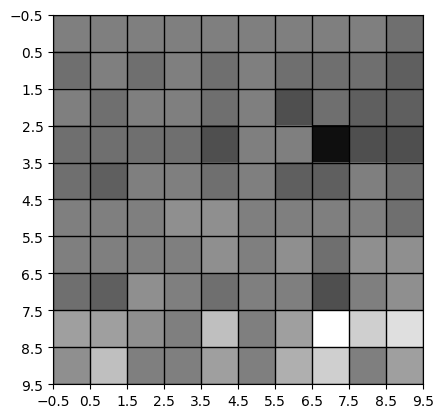

Activation Errors =  [ 29.46498105  28.91447629  76.83129843 100.78609081  74.28225226
 101.76209255  40.75013621  67.22539337 106.27445414  96.42734211]


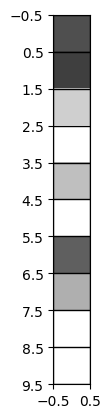

Please press enter
iterations = 100
Accuracy = 0.785


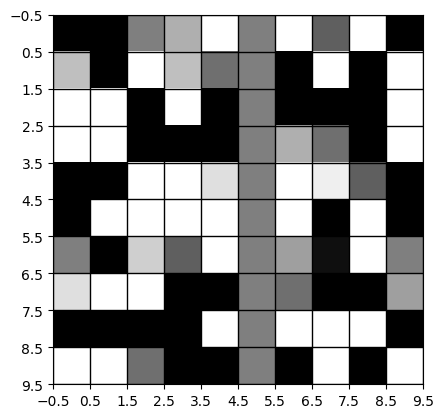

Activation Errors =  [ 21.5509131   22.8594286   59.70421985 110.93903361  72.18402183
 112.89369533  31.77607297  50.00988195 102.08429617  99.42618618]


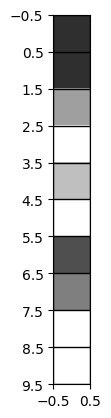

Please press enter
iterations = 200
Accuracy = 0.817


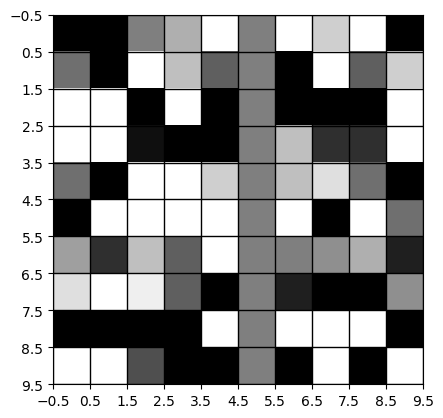

Activation Errors =  [26.08281931 18.36188061 54.9485684  92.53860949 56.60054001 83.25771319
 30.33878011 42.48569852 85.56266522 84.04713895]


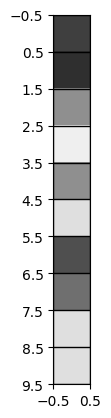

Please press enter
iterations = 300
Accuracy = 0.822


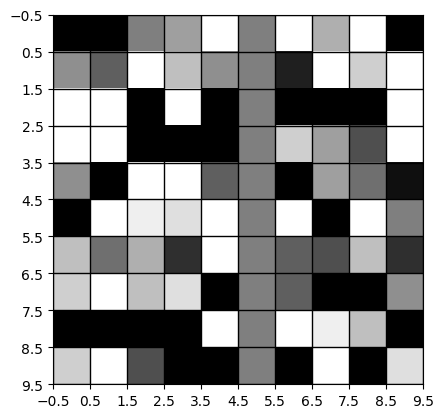

Activation Errors =  [23.28639034 20.98431874 54.49065598 85.73512159 59.26398318 82.15889869
 28.68230096 49.15539537 83.24294461 82.08557467]


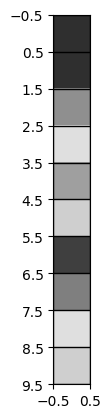

Please press enter
iterations = 400
Accuracy = 0.85


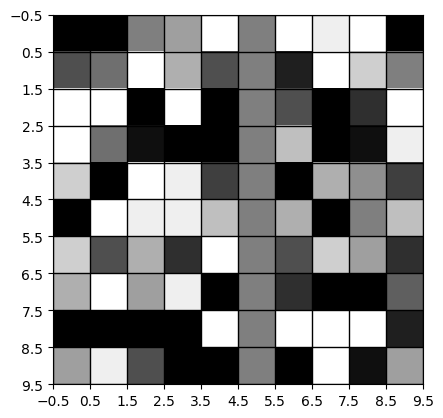

Activation Errors =  [22.35877024 17.36661863 51.99764755 76.44649432 48.56211501 70.9773525
 31.21180644 35.05675782 69.15276049 70.33787029]


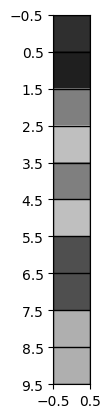

In [12]:
# accuracySum = 0
# runCount = 0

telementary = 0
lastWeights = nt.output_layer.weights

dataLen = len(X_train[0])
batchSize = 1000
maxIt = 450
for it in range(maxIt):
    spliceRange = [(batchSize*it)%dataLen, batchSize*(it+1)%dataLen]    ## [start, end]

    if(spliceRange[0] >= spliceRange[1]):
        # spliceRange[0] = dataLen - spliceRange[0]
        # if(spliceRange[0] >= spliceRange[1]):
        spliceRange[0] = 0
        spliceRange[1] = batchSize

    ## Verifying batch size
    X_Train_Batch = X_train.T[spliceRange[0]:spliceRange[1]].T
    Y_Train_Batch = Y_train[spliceRange[0]:spliceRange[1]]
    if(telementary==2): print("SPLICE:", spliceRange)
    if(telementary==2): print("X size:", X_Train_Batch.shape)
    if(telementary==2): print("Y size:", Y_Train_Batch.shape)
    if(X_Train_Batch.shape[1] == 0):
        print("error no X: spliceRange", spliceRange)

    Y_train_oneHot = one_hot(Y_Train_Batch, maxExpected=9)
    predictedRAW = nt.backward_prop(input_values=(X_Train_Batch), trueOutput=Y_train_oneHot)

    if(it % 100 == 0):
        print("Please press enter")
        pauser = input("Press enter for next iteration.")
        clearScreen()
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_Train_Batch))
        # print("Weights of output:")
        # print(nt.output_layer.weights)
        newWeights = nt.output_layer.weights

        # print weight changes made
        printMap((newWeights - lastWeights)*50)

        finalMAE = np.sum(np.absolute(predictedRAW[1]), axis=1) ## MAE of output activation errors over last ran single batch

        print("Activation Errors = ", finalMAE)
        printMap((finalMAE[:, np.newaxis]/100) - 0.5, sizes=[1,10])

        lastWeights = newWeights #nt.output_layer.weights


# telementary = 1

# # accuracy = accuracySum/len(X_train)
# accuracy = accuracySum/runCount



#### Testing with Netwok 784-1

In [21]:
n1 = nnetwork(784, 10, insertDefault=0)
n1.addLayerAtLast(40,isDynamic=1,activationFn="relu")
n1.addLayerAtLast(10,isDynamic=1,activationFn="relu")
n1.output_layer.activationFn = "softmax"

In [22]:
telementary = 0

In [23]:
print(n1.output_layer.weights.shape)
# print(n1.output_layer.input_layers[0].weights.shape)

(10, 10)


In [24]:
out = (n1.forward_prop(X_train.T[0].T))
print(out)

Provided input from cache for runNum = 0
Input values should be a 2D array.
activation = [[0.        ]
 [2.9916857 ]
 [0.        ]
 [3.41190866]
 [0.        ]
 [1.63375024]
 [1.86181064]
 [1.53379836]
 [2.44559512]
 [0.        ]
 [2.4896451 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [4.34338224]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03607738]
 [1.30454781]
 [0.        ]
 [0.        ]
 [4.76392279]
 [0.        ]
 [6.29498297]
 [0.        ]
 [0.        ]
 [4.07445885]
 [0.        ]
 [6.01667431]
 [3.13601822]
 [0.        ]
 [1.48490926]
 [0.99568503]
 [0.        ]
 [1.42662526]
 [3.15315278]
 [0.        ]
 [2.96703067]] & cached
activation = [[0.        ]
 [1.98936641]
 [0.        ]
 [0.        ]
 [6.65770714]
 [0.        ]
 [0.        ]
 [9.20185923]
 [7.67072094]
 [7.92496732]] & cached
activation = [[7.04880609e-05]
 [2.35781675e-04]
 [4.22366523e-05]
 [9.21687142e-10]
 [4.50151094e-04]
 [9.85376763e-01]
 [4.25853695e-06]
 [1.38131551e-02]
 [3.41332322e-09]
 [7

In [25]:
predRaw = n1.backward_prop(input_values=X_train.T[0:1].T, trueOutput=one_hot(Y_train[0:1], maxExpected=9))

Provided input from cache for runNum = 2
activation = [[0.        ]
 [2.9916857 ]
 [0.        ]
 [3.41190866]
 [0.        ]
 [1.63375024]
 [1.86181064]
 [1.53379836]
 [2.44559512]
 [0.        ]
 [2.4896451 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [4.34338224]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03607738]
 [1.30454781]
 [0.        ]
 [0.        ]
 [4.76392279]
 [0.        ]
 [6.29498297]
 [0.        ]
 [0.        ]
 [4.07445885]
 [0.        ]
 [6.01667431]
 [3.13601822]
 [0.        ]
 [1.48490926]
 [0.99568503]
 [0.        ]
 [1.42662526]
 [3.15315278]
 [0.        ]
 [2.96703067]] & cached
activation = [[0.        ]
 [1.98936641]
 [0.        ]
 [0.        ]
 [6.65770714]
 [0.        ]
 [0.        ]
 [9.20185923]
 [7.67072094]
 [7.92496732]] & cached
activation = [[7.04880609e-05]
 [2.35781675e-04]
 [4.22366523e-05]
 [9.21687142e-10]
 [4.50151094e-04]
 [9.85376763e-01]
 [4.25853695e-06]
 [1.38131551e-02]
 [3.41332322e-09]
 [7.16182733e-06]] & cached
Re-used Ca

In [27]:
telementary = 0

lastWeights = nt.output_layer.weights

dataLen = len(X_train)

maxIt = 450
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = n1.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))

Provided input from cache for runNum = 453
activation = [[0.         3.19359189 0.         ... 0.         0.         0.        ]
 [0.         0.08314149 0.         ... 0.         0.         0.        ]
 [0.         2.36289087 2.60708641 ... 2.17205416 0.         0.        ]
 ...
 [1.57041935 0.         4.05998458 ... 0.07499223 1.45345901 5.61164976]
 [0.         0.36930347 0.         ... 0.         2.99686682 1.44734996]
 [2.87316367 4.87721114 2.37247782 ... 3.5457885  0.         0.        ]] & cached
activation = [[ 3.62707353  2.03540834  0.         ...  2.47817527  1.2373401
   7.73234434]
 [ 3.00948017  2.44218422  3.97616488 ...  8.83450879  3.4065443
   4.40396014]
 [ 0.5263285   5.96626725  1.84581033 ...  4.9584489   0.
   0.        ]
 ...
 [ 8.89927779  0.73326342  8.66549539 ...  6.60894747 19.45523364
   9.60252296]
 [ 1.49257645  0.          0.12576186 ...  0.64990569 11.76872827
   2.88631439]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] & ca

KeyboardInterrupt: 

## Gradient Descending Telemetry
### For each batch

In [1]:
# accuracySum = 0
# runCount = 0

telementary = 0
lastWeights = nt.output_layer.weights

dataLen = len(X_train[0])
batchSize = 1000
maxIt = 450
for it in range(maxIt):
    spliceRange = [(batchSize*it)%dataLen, batchSize*(it+1)%dataLen]    ## [start, end]

    if(spliceRange[0] >= spliceRange[1]):
        # spliceRange[0] = dataLen - spliceRange[0]
        # if(spliceRange[0] >= spliceRange[1]):
        spliceRange[0] = 0
        spliceRange[1] = batchSize

    ## Verifying batch size
    X_Train_Batch = X_train.T[spliceRange[0]:spliceRange[1]].T
    Y_Train_Batch = Y_train[spliceRange[0]:spliceRange[1]]
    if(telementary==2): print("SPLICE:", spliceRange)
    if(telementary==2): print("X size:", X_Train_Batch.shape)
    if(telementary==2): print("Y size:", Y_Train_Batch.shape)
    if(X_Train_Batch.shape[1] == 0):
        print("error no X: spliceRange", spliceRange)

    Y_train_oneHot = one_hot(Y_Train_Batch, maxExpected=9)
    predictedRAW = n1.backward_prop(input_values=(X_Train_Batch), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("Please press enter")
        pauser = input("Press enter for next iteration.")
        clearScreen()
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_Train_Batch))
        # print("Weights of output:")
        # print(n1.output_layer.weights)
        newWeights = n1.output_layer.weights

        # print weight changes made
        if(newWeights.shape == lastWeights.shape):
            printMap((newWeights - lastWeights)*50)

        finalMAE = np.sum(np.absolute(predictedRAW[1]), axis=1) ## MAE of output activation errors over last ran single batch
        finalMAE_MAX = np.max(finalMAE)

        print("Activation Errors = ", finalMAE)
        printMap((finalMAE[:, np.newaxis]/finalMAE_MAX) - 0.5, sizes=[1,10])

        lastWeights = newWeights #n1.output_layer.weights


NameError: name 'nt' is not defined

## Measuring Variance in Activation Errors
To predict where more detailed data separation is needed.

# Overfit

In [50]:
overNN = nnetwork(784, 10, insertDefault=0)
overNN.output_layer.activationFn = "softmax"


In [51]:
print("Last Layer")
print(overNN.output_layer.shape)
print(overNN.output_layer.weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.bias.shape)

print("2nd Last")
print(overNN.output_layer.input_layers[0].shape)
print(overNN.output_layer.input_layers[0].weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.input_layers[0].bias.shape)

Last Layer
10
(10, 784) wts.shape = (output.shape, input.shape)
(10, 1)
2nd Last
784


AttributeError: 'NoneType' object has no attribute 'shape'

In [60]:
overNN.addLayerAtLast(40,isDynamic=1, activationFn="relu", transferWeights=0)
# overNN.addLayerAtLast(10,isDynamic=1, activationFn="relu")

# TODO:

In [61]:
print("Last Layer")
print(overNN.output_layer.shape)
print(overNN.output_layer.weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.bias.shape)

print("2nd Last")
print(overNN.output_layer.input_layers[0].shape)
print(overNN.output_layer.input_layers[0].weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.input_layers[0].bias.shape)

Last Layer
10
(10, 864) wts.shape = (output.shape, input.shape)
(10, 1)
2nd Last
40
(40, 40) wts.shape = (output.shape, input.shape)
(40, 1)


In [15]:
# overNN.output_layer.input_layers[0].weights = np.random.rand(40,784)

In [29]:
telementary = 1
out = (overNN.forward_prop(X_train.T[0].T))
# telementary = 1
print(out)

Provided input from cache
Input values should be a 2D array.
Adding to weight.shape[0]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### Gradient Descent on MNIST

In [230]:
# accuracySum = 0
# runCount = 0

telementary = 0

# lastWeights = overNN.output_layer.weights

dataLen = len(X_train)

maxIt = 5000
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = overNN.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))
        # newWeights = nt.output_layer.weights

        # printMap((newWeights - lastWeights)*50)

        # lastWeights = newWeights #nt.output_layer.weights


iterations = 0
Accuracy = 0.08102439024390244
iterations = 50
Accuracy = 0.09629268292682927
iterations = 100
Accuracy = 0.16651219512195123
iterations = 150
Accuracy = 0.19514634146341464
iterations = 200
Accuracy = 0.2105121951219512
iterations = 250
Accuracy = 0.22439024390243903
iterations = 300
Accuracy = 0.2355121951219512
iterations = 350
Accuracy = 0.2474390243902439
iterations = 400
Accuracy = 0.2581951219512195
iterations = 450
Accuracy = 0.2674146341463415
iterations = 500
Accuracy = 0.2760975609756098
iterations = 550
Accuracy = 0.28580487804878046
iterations = 600
Accuracy = 0.29517073170731706
iterations = 650
Accuracy = 0.30585365853658536
iterations = 700
Accuracy = 0.31726829268292683
iterations = 750
Accuracy = 0.3289268292682927
iterations = 800
Accuracy = 0.33963414634146344
iterations = 850
Accuracy = 0.34685365853658534
iterations = 900
Accuracy = 0.35460975609756096
iterations = 950
Accuracy = 0.36085365853658535
iterations = 1000
Accuracy = 0.36860975609756097
i





## Simulator

In [46]:
wt = nt.output_layer.input_layers[0].input_layers[0].weights
# print(wt.shape)

# x1 = X_trainT[0:2]
x1 = X_trainT[0]

print("wt", wt.shape)
print("x1", x1.shape)
print("x1T", x1.T.shape)

act1 = np.matmul(wt, x1.T)
act1

# Playground

In [88]:
x = np.array([[1,2,3], [5,6,7]])
x.shape

(2, 3)

In [89]:
empt = np.array([[]])
empt

array([], shape=(1, 0), dtype=float64)

In [103]:

if(empt.shape[1] > 0):
    empt = np.concatenate((empt, x))
else:
    empt = x

print(empt)


[[1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]]


In [27]:
y = np.array([[-1,0,1]])

x + y

array([[0, 2, 4],
       [4, 6, 8]])

In [35]:
x = np.random.rand(4,2) - 0.5
print(x)

[[-0.21379049  0.318942  ]
 [ 0.33342107 -0.20130355]
 [-0.22479054  0.23240682]
 [-0.10478904 -0.04715419]]


In [40]:
def applyDerivActivationFn(input):
    return (input > 0)

In [41]:
applyDerivActivationFn(x)

array([[False,  True],
       [ True, False],
       [False,  True],
       [False, False]])

# Main

In [5]:
n1 = nnetwork(2,1)

in1 = np.array([0,1,2])
wtMat = np.array([[5,6,7],[8,9,10]])
# biases = np.array([5,25])
biases = np.array([0.5,0.25])

In [37]:
output_activations = np.matmul(wtMat, in1) + biases
print(output_activations)

[20.5  29.25]
